In [8]:
# Import Libraries
import pickle
import pprint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

In [2]:
plt.figure(figsize=(15,10))
style.use('seaborn-poster')
sns.set_style('ticks')

<Figure size 1080x720 with 0 Axes>

In [65]:

with open('results/rf', 'rb') as file:
    grid_rf = pickle.load(file)

with open('results/log_reg', 'rb') as file:
    grid_lr = pickle.load(file)
    
with open('results/dec_tree', 'rb') as file:
    grid_dt = pickle.load(file)

with open('results/xgboost', 'rb') as file:
    grid_xgboost = pickle.load(file)
    
results = {
    'log_reg': grid_lr,
    'dec_tree': grid_dt,
    'rf': grid_rf,
    'xgboost':grid_xgboost
}

print(results)

{'log_reg': GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100],
                         'fit_intercept': [True, False], 'n_jobs': [-1],
                         'penalty': ['l2', 'none']},
             verbose=3), 'dec_tree': GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [None, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=3), 'rf': GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 3, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500],
                         'oob_score': [True, False]},
 

In [66]:
# Contains test data
with open('data/preprocessed_data', 'rb') as file:
    data = pickle.load(file)

y_true = data['y_test'].tolist()

In [86]:
# Graph confusion matrix
def confusion_matrix_plt(y_pred, y_true):
    conf_mtrx = confusion_matrix(y_true, y_pred)
    acc_score = accuracy_score(y_true, y_pred)
    print()
    print(f'Accuracy: {acc_score}')
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                conf_mtrx.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in conf_mtrx.flatten()/np.sum(conf_mtrx)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_mtrx,cmap='Blues',cbar=False, fmt='', annot=labels,
                xticklabels=['False', 'True'],yticklabels=['False', 'True'],annot_kws={"size": 20})
    plt.show()

CV score: 0.6810738255033556
max_depth: 7
max_leaf_nodes: None
min_samples_leaf: 7

Accuracy: 0.6894830085359961


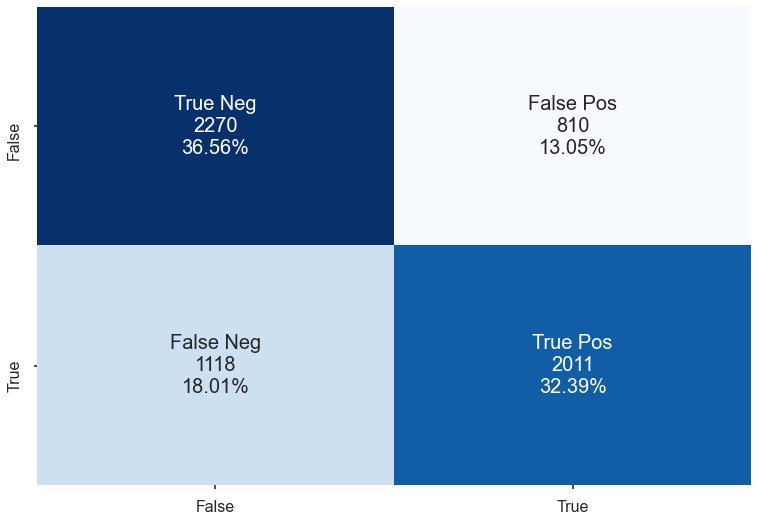

In [87]:
# Decision Tree results
dec_tree = results['dec_tree'].best_estimator_
print(f'CV score: {results["dec_tree"].best_score_}')
for key, value in results["dec_tree"].best_params_.items():
    print(f'{key}: {value}')

y_pred = dec_tree.predict(data['x_test'])
y_pred_prob = dec_tree.predict_proba(data['x_test'])[:,1]
dec_tree_result = [y_true, y_pred_prob]
confusion_matrix_plt(y_pred, data['y_test'])

CV score: 0.6830604026845638
bootstrap: True
max_depth: 5
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 10
n_estimators: 100
oob_score: True

Accuracy: 0.6910935738444194


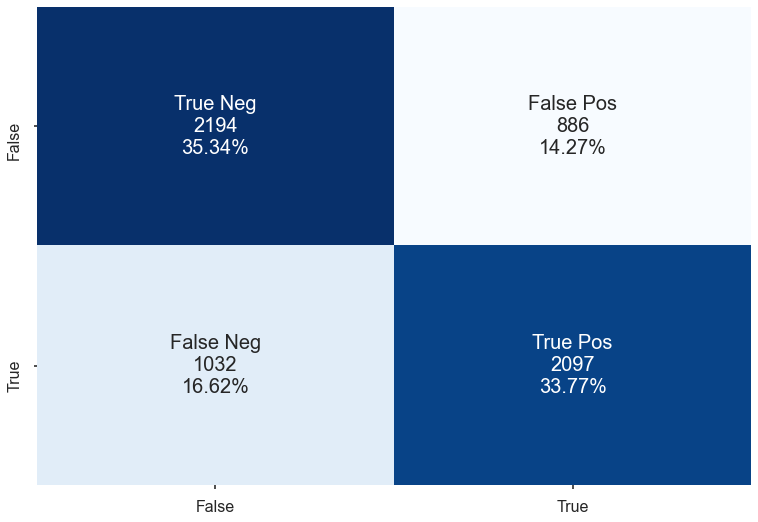

In [88]:
# Random Forest results
rf = results['rf'].best_estimator_
print(f'CV score: {results["rf"].best_score_}')
for key, value in results["rf"].best_params_.items():
    print(f'{key}: {value}')

y_pred = rf.predict(data['x_test'])
y_pred_prob = rf.predict_proba(data['x_test'])[:,1]
rf_result = [y_true, y_pred_prob]
confusion_matrix_plt(y_pred, data['y_test'])

CV score: 0.660026845637584
C: 0.01
fit_intercept: True
n_jobs: -1
penalty: l2

Accuracy: 0.635529070703817


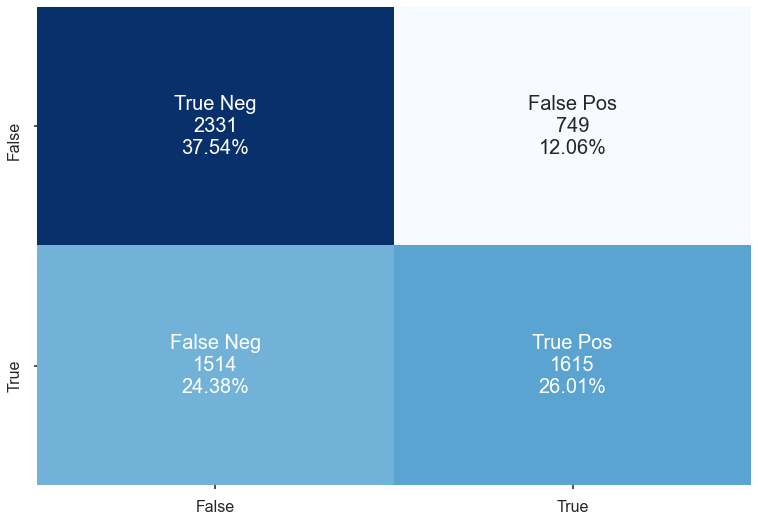

In [89]:
# Logistic Regression results
log_reg = results['log_reg'].best_estimator_
print(f'CV score: {results["log_reg"].best_score_}')
for key, value in results["log_reg"].best_params_.items():
    print(f'{key}: {value}')

y_pred = log_reg.predict(data['x_test'])
y_pred_prob = log_reg.predict_proba(data['x_test'])[:,1]
log_reg_result = [y_true, y_pred_prob]
confusion_matrix_plt(y_pred, data['y_test'])

CV score: 0.7073288590604027
learning_rate: 0.09
max_depth: 3
n_estimators: 500
n_jobs: -1
reg_alpha: 1
reg_lambda: 0.09

Accuracy: 0.7158962795941376


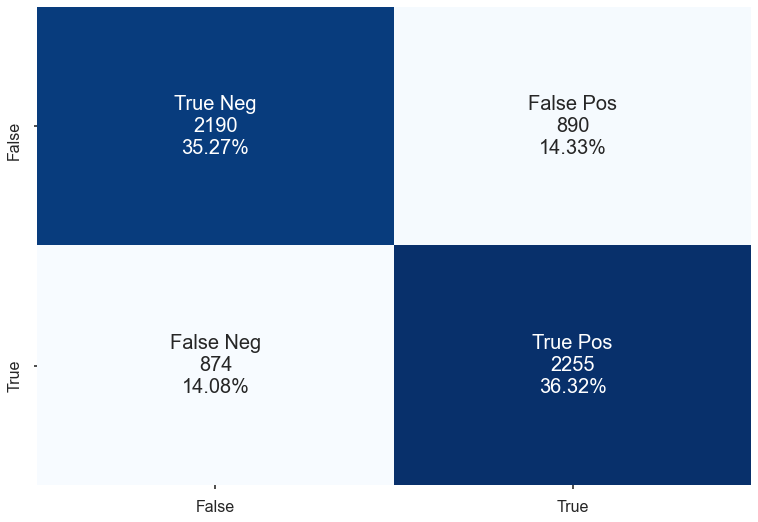

In [90]:
# XGBoost Result
xgboost = results['xgboost'].best_estimator_
print(f'CV score: {results["xgboost"].best_score_}')
for key, value in results["xgboost"].best_params_.items():
    print(f'{key}: {value}')

y_pred = xgboost.predict(data['x_test'])
y_pred_prob = xgboost.predict_proba(data['x_test'])[:,1]
xgboost_result = [y_true, y_pred_prob]
confusion_matrix_plt(y_pred, data['y_test'])

Text(0.5, 1.0, 'ROC Curve')

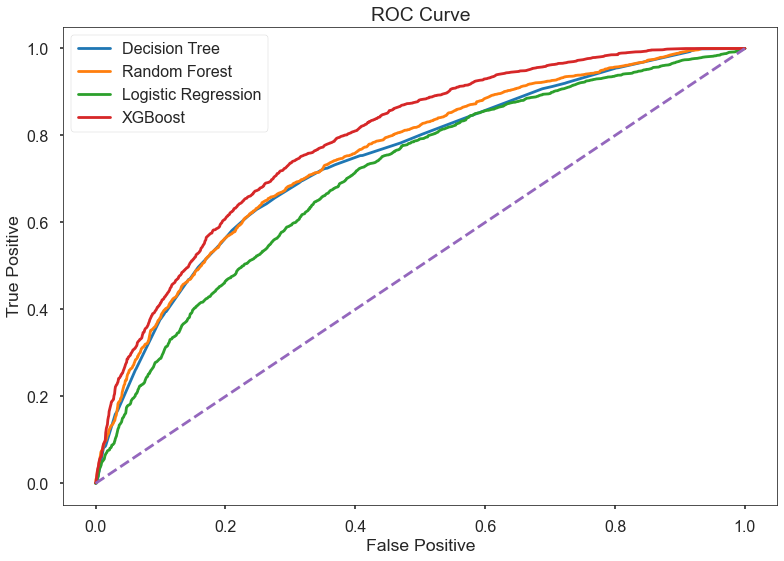

In [91]:
all_results = {
    'Decision Tree': dec_tree_result,
    'Random Forest': rf_result,
    'Logistic Regression': log_reg_result,
    'XGBoost':xgboost_result
}
for key, value in all_results.items():
    fpr, tpr, _ = roc_curve(value[0], value[1])
    sns.lineplot(x=fpr, y=tpr, label=key)
ax = sns.lineplot(x=[0, 0.5, 1], y=[0, 0.5, 1])
ax.lines[len(all_results)].set_linestyle("--")
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title(f'ROC Curve')